In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [4]:
train_data=pd.read_excel(r'C:\Users\gupta\OneDrive\Desktop\FLIGHT FARE PREDICTION\Data_Train.xlsx')

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [5]:
!pip install openpyxl

In [6]:
train_data=pd.read_excel(r'C:\Users\gupta\OneDrive\Desktop\FLIGHT FARE PREDICTION\Data_Train.xlsx')

In [8]:
pd.set_option('display max_columns',None)

OptionError: No such keys(s): 'display max_columns'

In [9]:
import pandas as pd

# Set the option to display all columns
pd.set_option('display.max_columns', None)


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
train_data['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 10m      1
31h 30m      1
42h 5m       1
4h 10m       1
5m           1
Name: count, Length: 368, dtype: int64

In [12]:
train_data.dropna(inplace=True)

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [16]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [17]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [19]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\481262791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour


In [20]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\2884915336.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\2884915336.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [21]:
import pandas as pd

# Assuming train_data is your DataFrame
# Specify the format explicitly
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.minute

# Print to verify the changes
print(train_data.head())


KeyError: 'Dep_Time'

In [22]:
import pandas as pd

# Assuming train_data is your DataFrame
# Check the columns
print(train_data.columns)

# Inspect the data
print(train_data.head())

# Specify the format explicitly
if 'Dep_Time' in train_data.columns:
    train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.hour
    train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.minute
else:
    print("Column 'Dep_Time' not found in the DataFrame")



Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min'],
      dtype='object')
       Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   
3   5h 25m    

In [23]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


KeyError: 'Dep_Time'

In [26]:
train_data.columns = train_data.columns.str.strip()


In [27]:
print(train_data.columns)


Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min'],
      dtype='object')


In [28]:
if 'Dep_Time' in train_data.columns:
    train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.hour
    train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.minute
else:
    print("Column 'Dep_Time' not found in the DataFrame after stripping spaces.")


Column 'Dep_Time' not found in the DataFrame after stripping spaces.


In [29]:
import pandas as pd

# Assuming train_data is your DataFrame
# Strip leading and trailing spaces from column names
train_data.columns = train_data.columns.str.strip()

# Print column names to verify
print(train_data.columns)

# Convert 'Dep_Time' to hours and minutes
if 'Dep_Time' in train_data.columns:
    train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.hour
    train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"], format='%H:%M').dt.minute
else:
    print("Column 'Dep_Time' not found in the DataFrame after stripping spaces.")


Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min'],
      dtype='object')
Column 'Dep_Time' not found in the DataFrame after stripping spaces.


In [30]:
train_data["Dep_Time"] = train_data["Dep_hour"].astype(str).str.zfill(2) + ':' + train_data["Dep_min"].astype(str).str.zfill(2)
print(train_data[["Dep_hour", "Dep_min", "Dep_Time"]].head())


   Dep_hour  Dep_min Dep_Time
0        22       20    22:20
1         5       50    05:50
2         9       25    09:25
3        18        5    18:05
4        16       50    16:50


In [31]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Dep_Time
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,22:20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,05:50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,09:25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,18:05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,16:50


In [32]:
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [33]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [34]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\4054205965.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\4054205965.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [35]:
import pandas as pd

# Assuming train_data is your DataFrame
# Specify the format explicitly for Arrival_Time
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"], format='%H:%M').dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"], format='%H:%M').dt.minute

# Print to verify the changes
print(train_data[["Arrival_Time", "Arrival_hour", "Arrival_min"]].head())


KeyError: 'Arrival_Time'

In [36]:
print(train_data.columns)


Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')


In [37]:
print(train_data.head())


       Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   
3      1 stop         No info   6218           12              5        18   
4      1 stop         No info  13302            1              3        16   

   Dep_min  Arrival_hour  Arrival_min  
0       20             1           10  
1       50        

In [38]:
train_data.columns = train_data.columns.str.strip()


In [39]:
import pandas as pd

# Strip leading and trailing spaces from column names
train_data.columns = train_data.columns.str.strip()

# Print column names to verify
print(train_data.columns)

# Inspect the data
print(train_data.head())

# Specify the format explicitly if Arrival_Time column exists
if 'Arrival_Time' in train_data.columns:
    train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"], format='%H:%M').dt.hour
    train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"], format='%H:%M').dt.minute
else:
    print("Column 'Arrival_Time' not found in the DataFrame after stripping spaces.")


Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')
       Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   
3      1 stop         No 

In [40]:
# Calculate total arrival time in minutes
train_data["Total_Arrival_Minutes"] = train_data["Arrival_hour"] * 60 + train_data["Arrival_min"]

# Print to verify the changes
print(train_data[["Arrival_hour", "Arrival_min", "Total_Arrival_Minutes"]].head())


   Arrival_hour  Arrival_min  Total_Arrival_Minutes
0             1           10                     70
1            13           15                    795
2             4           25                    265
3            23           30                   1410
4            21           35                   1295


In [42]:
train_data.drop(["Total_Arrival_Minutes"], axis = 1, inplace = True)

In [43]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [44]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [45]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [46]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [47]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [48]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

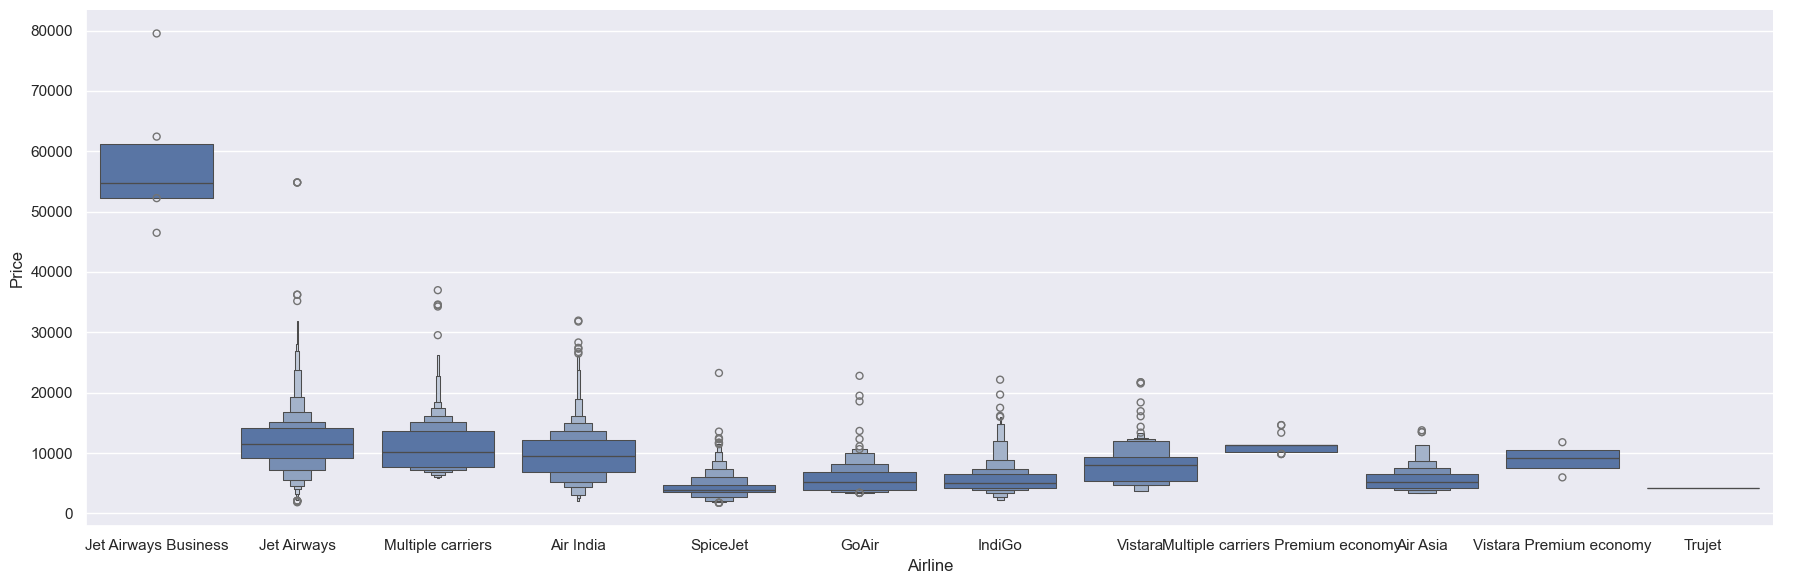

In [49]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [50]:
Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [51]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

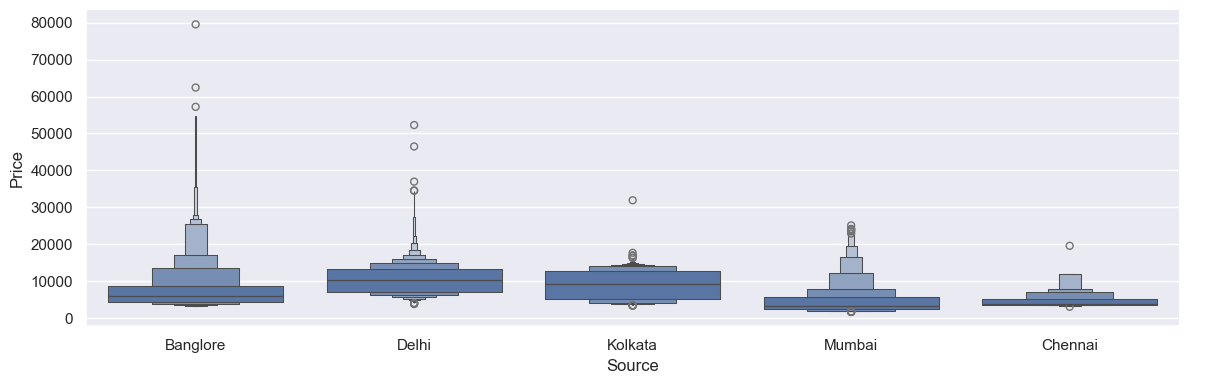

In [52]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [53]:
Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [54]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [55]:
Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [56]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [57]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [58]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [59]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\2682453774.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [60]:
train_data = train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})
train_data.infer_objects(copy=False)



,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


In [61]:
import pandas as pd

# Set the pandas option for future behavior
pd.set_option('future.no_silent_downcasting', True)

# Your existing replace code
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)


In [62]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [63]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [64]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [65]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [66]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [67]:
data_train.shape


(10682, 30)

In [68]:
test_data = pd.read_excel(r"C:\Users\gupta\OneDrive\Desktop\FLIGHT FARE PREDICTION\Test_set.xlsx")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\gupta\\OneDrive\\Desktop\\FLIGHT FARE PREDICTION\\Test_set.xlsx'

In [69]:
import pandas as pd

# Update the path to the file
file_path = r"C:\Users\gupta\OneDrive\Desktop\FLIGHT FARE PREDICTION\Test_set.xlsx"

try:
    test_data = pd.read_excel(file_path)
    print("File loaded successfully.")
    print(test_data.head())
except PermissionError:
    print(f"Permission denied: '{file_path}'. Please check the file permissions or try moving the file to a different location.")
except FileNotFoundError:
    print(f"File not found: '{file_path}'. Please check if the file path is correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


File loaded successfully.
             Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info  


In [70]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [71]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\1226923026.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\1226923026.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\1226923026.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
C:\Users\gupta\AppData\Lo

Airline
---------------------------------------------------------------------------
Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

Source
---------------------------------------------------------------------------
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

Destination
---------------------------------------------------------------------------
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: 

In [72]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [73]:
data_train.shape

(10682, 30)

In [74]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [75]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [76]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [77]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()


ValueError: could not convert string to float: 'IndiGo'

<Figure size 1800x1800 with 0 Axes>

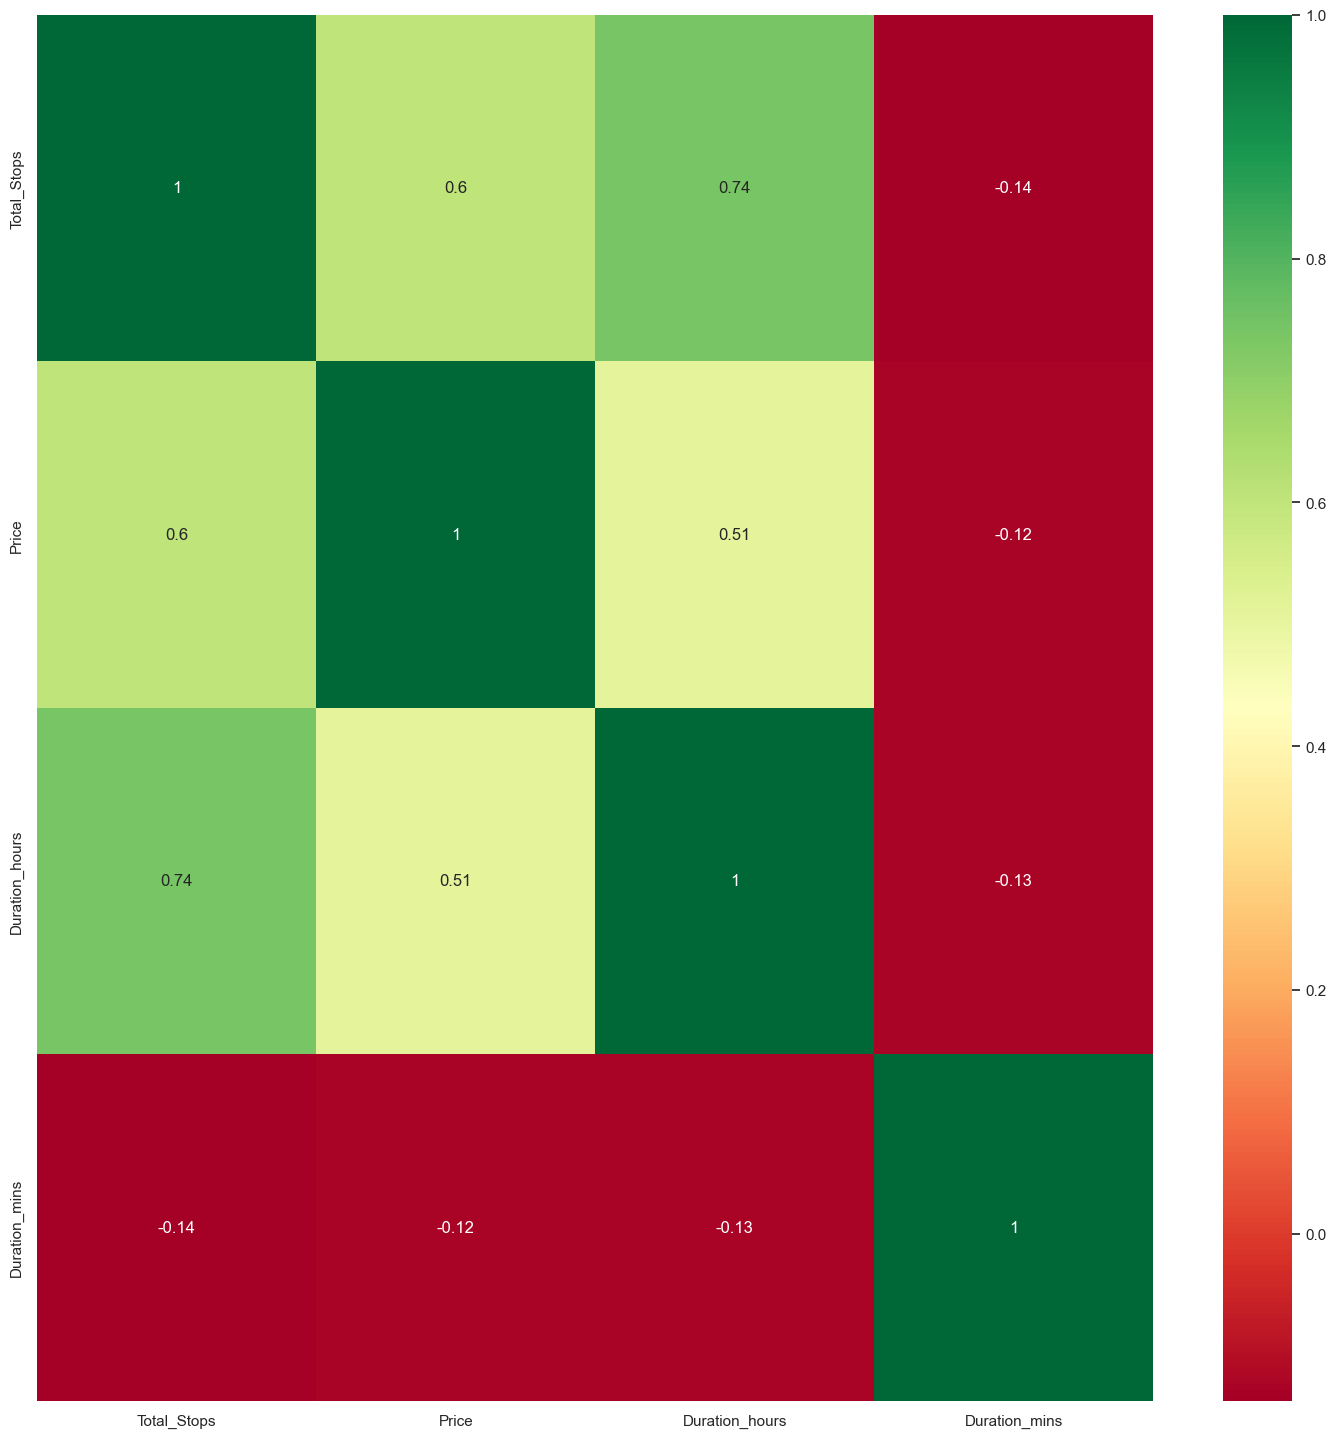

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Create the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(numeric_data.corr(), annot=True, cmap="RdYlGn")

plt.show()


In [79]:

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [80]:
ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

TypeError: ExtraTreesRegressor.__init__() got an unexpected keyword argument 'min_impurity_split'

In [81]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(
    bootstrap=False,
    ccp_alpha=0.0,
    criterion='mse',  # If you see a warning about this, consider changing 'mse' to 'squared_error'
    max_depth=None,
    max_features='auto',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)


In [82]:
print(selection.feature_importances_)

[2.16735952e-01 1.43267205e-01 5.41039553e-02 2.50288677e-02
 2.09085461e-02 2.73750689e-02 1.94866199e-02 1.26366297e-01
 1.74014021e-02 1.02540783e-02 1.70479821e-03 1.73506848e-02
 1.40116301e-01 6.75935759e-02 2.04531377e-02 9.02639930e-04
 2.67816745e-03 1.08307803e-04 5.18877943e-03 7.60038117e-05
 5.54442774e-04 1.31767395e-02 3.16298493e-03 5.81626292e-03
 1.10128087e-02 1.69252007e-02 6.44124151e-03 5.72652600e-04
 2.52372775e-02]


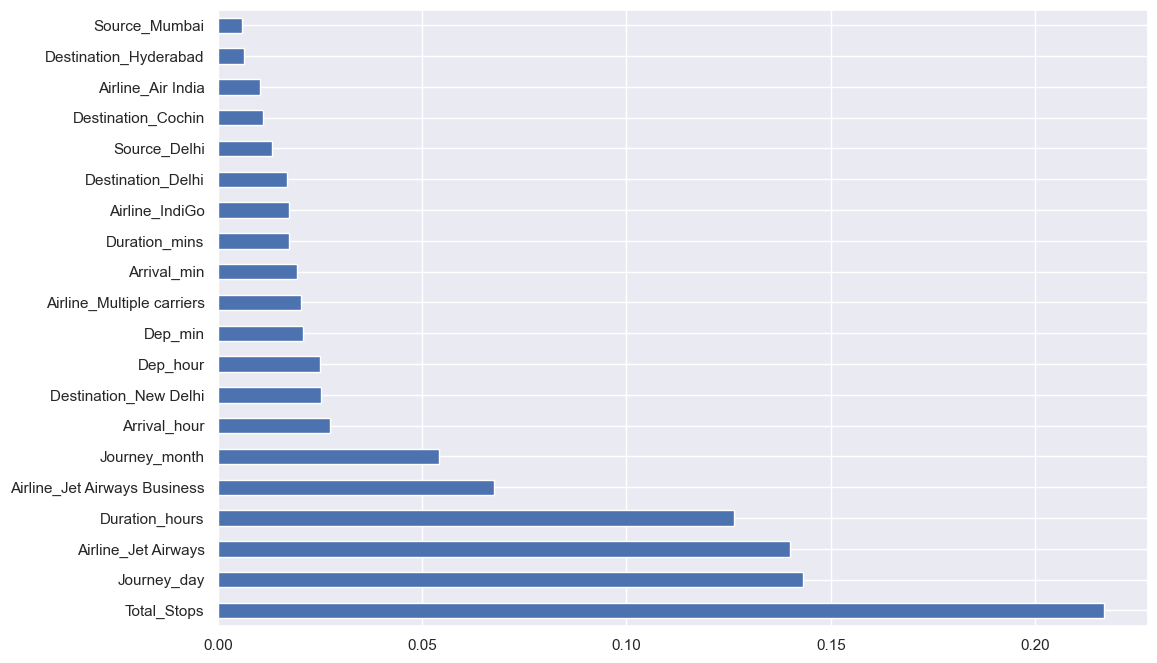

In [83]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [85]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [86]:
y_pred = reg_rf.predict(X_test)

In [87]:
reg_rf.score(X_train, y_train)

0.9534666698800237

In [88]:
reg_rf.score(X_test, y_test)

0.7959547577737858

C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\2619859745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


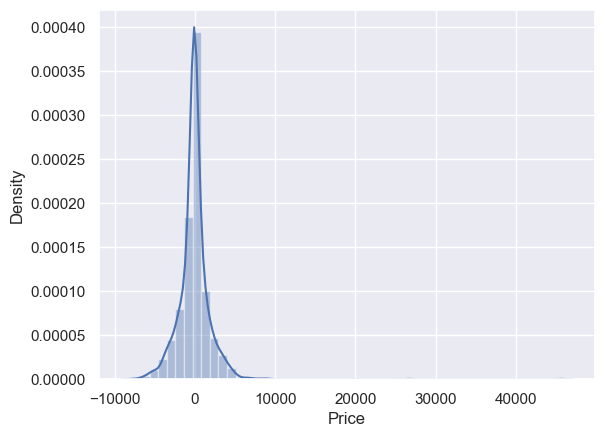

In [89]:
sns.distplot(y_test-y_pred)
plt.show()


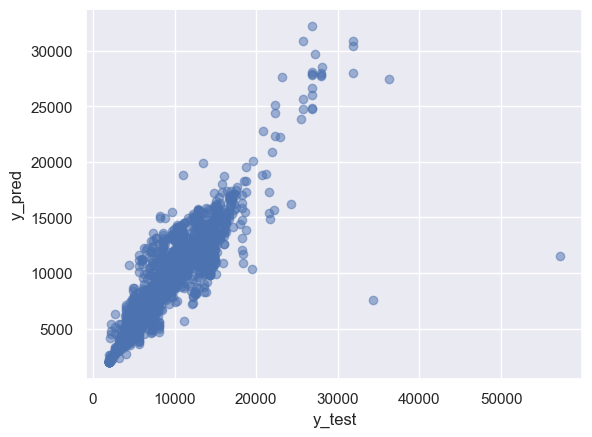

In [90]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [91]:
from sklearn import metrics

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1183.766211718934
MSE: 4399635.005558866
RMSE: 2097.530692399724


In [93]:
2090.5509/(max(y)-min(y))

0.026887077025966846

In [94]:
metrics.r2_score(y_test, y_pred)

0.7959547577737858

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [97]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [98]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [99]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  20.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Us

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [100]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    bootstrap=False,
    ccp_alpha=0.0,
    criterion='mse',  # 'squared_error' if you receive a warning
    max_depth=None,
    max_features='sqrt',  # Use 'sqrt' instead of 'auto'
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)


In [101]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [102]:
prediction = rf_random.predict(X_test)

C:\Users\gupta\AppData\Local\Temp\ipykernel_9660\1574001921.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


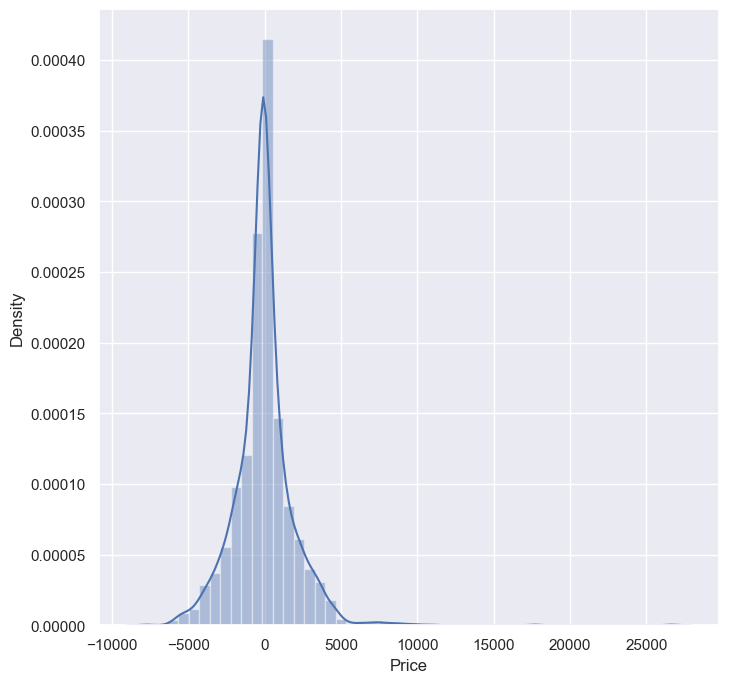

In [103]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()


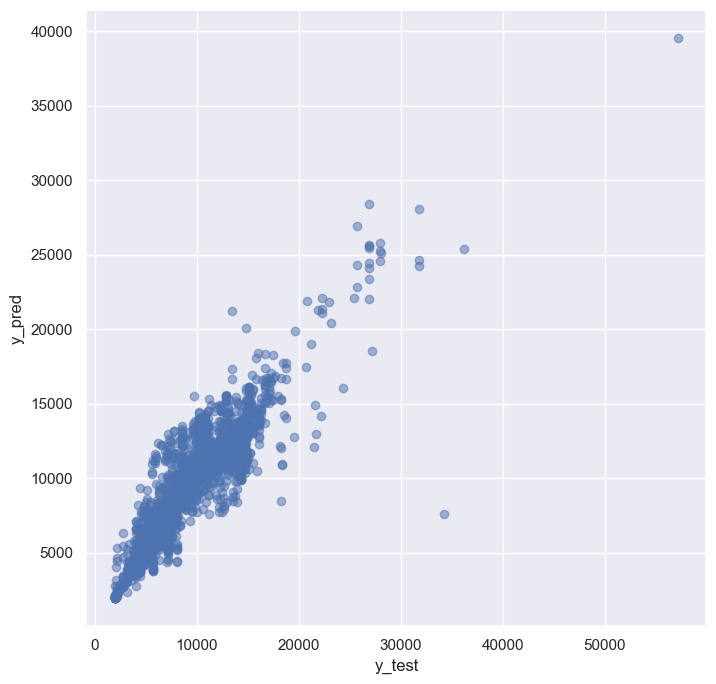

In [104]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
MAE: 1165.606162629916

MAE: 1261.764092782474
MSE: 3863706.2797637484
RMSE: 1965.6312674974797


In [109]:
import pickle
# open a file, where you ant to store the data
file = open('C:\Users\gupta\OneDrive\Desktop\FLIGHT FARE PREDICTION', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1953003665.py, line 3)

In [107]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)


FileNotFoundError: [Errno 2] No such file or directory: 'flight_price_rf.pkl'

In [108]:
model_path = r"C:\path\to\your\flight_price_rf.pkl"
with open(model_path, 'rb') as model_file:
    forest = pickle.load(model_file)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\path\\to\\your\\flight_price_rf.pkl'

In [110]:
# Using raw strings to handle backslashes
file_path = r'C:\Users\gupta\OneDrive\Desktop\FLIGHT FARE PREDICTION\flight_price_rf.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(forest, file)


NameError: name 'forest' is not defined

In [111]:
import pickle

# Save the model to a specific path
with open(r'C:\Users\gupta\OneDrive\Desktop\FLIGHT FARE PREDICTION\flight_rf.pkl', 'wb') as file:
    pickle.dump(reg_rf, file)


In [112]:
import os

# Get the current working directory
print(os.getcwd())


C:\Users\gupta\OneDrive\Desktop\FLIGHT FARE PREDICTION


In [117]:
import pickle

# Load the model from a specific path
with open(r'C:\Users\gupta\OneDrive\Desktop\FLIGHT FARE PREDICTION\flight_rf.pkl', 'rb') as file:
    forest= pickle.load(file)


In [118]:
y_prediction = forest.predict(X_test)

In [119]:
metrics.r2_score(y_test, y_prediction)

0.7959547577737858